In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [4]:
df_heartdisease = pd.read_csv('cleveland-heart-2.csv')
df_heartdisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,53,1,2,120,-9,0,0,132,0,0.0,-9,-9,-9,0
586,48,0,2,-9,308,0,1,-9,-9,2.0,1,-9,-9,0
587,36,1,2,120,166,0,0,180,0,0.0,-9,-9,-9,0
588,48,1,3,110,211,0,0,138,0,0.0,-9,-9,6,0


In [5]:
#CHECK KIND OF SPECIES

df_heartdisease['num'].unique()

array([0, 1], dtype=int64)

In [6]:
#FEATURES

heartdisease_X = df_heartdisease.drop('num', axis = 1)
heartdisease_X
#drop the last column aka num column into a single column

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,53,1,2,120,-9,0,0,132,0,0.0,-9,-9,-9
586,48,0,2,-9,308,0,1,-9,-9,2.0,1,-9,-9
587,36,1,2,120,166,0,0,180,0,0.0,-9,-9,-9
588,48,1,3,110,211,0,0,138,0,0.0,-9,-9,6


In [7]:
#label, target, groundtruth

heartdisease_y = df_heartdisease['num'] #column y is the last column in dataset with the name num
heartdisease_y

0      0
1      1
2      1
3      0
4      0
      ..
585    0
586    0
587    0
588    0
589    0
Name: num, Length: 590, dtype: int64

In [8]:
#SPLIT DATA

#Split data into train set (80%), test set (20%)
#optional

X_train, X_test, y_train, y_test = train_test_split(heartdisease_X, heartdisease_y, test_size = 0.2, random_state = 0) #init parameters
print(X_train.shape) #row 0 to 472 of column 1 - 13
print(X_test.shape) #row 473 to 589 of column 1 - 3
print(y_train.shape) #row 0  to 472 of column num
print(y_test.shape)

(472, 13)
(118, 13)
(472,)
(118,)


In [9]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std

array([[ 0.76491902,  0.65928026, -0.04757894, ...,  0.73379371,
         1.02007751,  1.20578916],
       [-0.98717938,  0.65928026, -0.04757894, ..., -1.47995233,
        -1.02614682, -1.07930989],
       [-1.86322858,  0.65928026, -1.06836348, ..., -1.47995233,
        -1.02614682, -1.07930989],
       ...,
       [-0.65866093,  0.65928026,  0.9732056 , ..., -1.47995233,
        -1.02614682, -1.07930989],
       [ 1.75047437,  0.65928026,  0.9732056 , ...,  0.73379371,
         1.22469995,  0.6345144 ],
       [ 0.32689442, -1.51680562, -1.06836348, ...,  0.53254407,
        -1.02614682, -1.07930989]])

In [10]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[3.36545386 1.88790271 0.10896976 1.22833622 0.27634194 0.37411608
 0.49257944 1.05956301 1.03584155 0.72192962 0.86005986 0.82603427
 0.79047253]


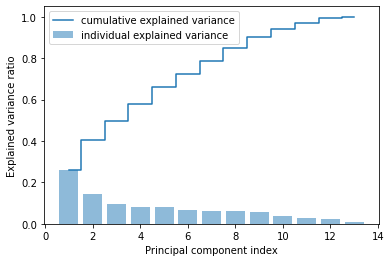

In [11]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [12]:
#Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

#Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [13]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.30912549 -0.10167221]
 [-0.02296951 -0.18909781]
 [-0.21568433 -0.36051438]
 [-0.11419567 -0.31545825]
 [-0.13033396 -0.04217729]
 [-0.10837157  0.04435995]
 [-0.28201142  0.16296897]
 [ 0.03647633  0.47556898]
 [-0.19302601 -0.41031371]
 [-0.32099991 -0.29437916]
 [-0.4561702   0.01972204]
 [-0.4426158   0.34110248]
 [-0.43641858  0.31014915]]


In [14]:
X_train_std[0].dot(w)

array([-2.20319367,  1.24173655])

In [15]:
X_train_pca = X_train_std.dot(w)

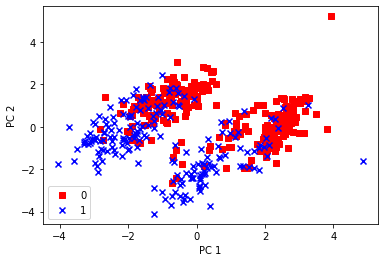

In [16]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers): plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], 
                                                                     c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()